In [14]:
class Line:
    def __init__(self, m, n):
        self.m = m
        self.n = n

    def __call__(self, x):
        return self.m * x + self.n

import math


def angle_between_lines(line1, line2, point):
    # Calculate the slopes
    m1 = line1.m
    m2 = line2.m

    # Calculate the angle in radians
    theta_radians = abs(math.atan((m1 - m2) / (1 + m1 * m2)))

    # Convert to degrees
    theta_degrees = math.degrees(theta_radians)

    # Calculate y values of the lines at the point's x-coordinate
    y1 = line1(point[0])
    y2 = line2(point[0])

    # Determine which angle the point is facing
    if ((point[1] > y1 and point[1] > y2) or (point[1] < y1 and point[1] < y2)) and (m1 > 0):
        # The point is above or below both lines, so it faces the external angle
        facing_angle = 180 - theta_degrees
    else:
        # The point is between the lines, so it faces the internal angle
        facing_angle = theta_degrees

    return facing_angle

# Example usage
line1 = Line(-9.222222222222221, 1385.6666666666665)  # y = x
line2 = Line(0.322222222222221, 0)  # y = -x
line3 = Line(-14.625,1105.0)
angle = angle_between_lines(line1, line2, [72, 52])
print(f"The angle between the lines is {angle} degrees.")

angle = angle_between_lines(line3, line2, [144, 52])
print(f"The angle between the lines is {angle} degrees.")


The angle between the lines is 78.32852189256262 degrees.
The angle between the lines is 76.05147774184967 degrees.


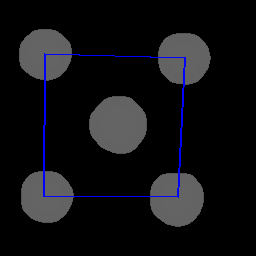

In [2]:
from PIL import Image, ImageDraw
import IPython.display as display

background_image_path = "image.png"
ox1 = [44, 185, 178, 43]
oy1 = [53, 57, 197, 196]

area_coords= list(zip(ox1, oy1))
img = Image.open(background_image_path)

img = Image.open(background_image_path)
draw = ImageDraw.Draw(img)

# Draw the area boundary
draw.polygon(area_coords, outline="blue", fill=None, width=2)

display.display(img)

In [3]:
def get_line_from_two_points(p1, p2):
    if p1[0] == p2[0]:  # Vertical line
        raise ValueError("Vertical line - slope is undefined.")
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    n = p1[1] - m * p1[0]
    return Line(m, n)

def is_point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

import math

def get_point_given_distance(distance, line, origin, area):
    # Calculate the two possible points at the given distance
    dx = distance / math.sqrt(1 + line.m ** 2)
    dy = line.m * dx

    point1 = [origin[0] + dx, origin[1] + dy]
    point2 = [origin[0] - dx, origin[1] - dy]

    if is_point_in_polygon(point1, area):
        return point1
    if is_point_in_polygon(point2, area):
        return point2

    return None  # This should not happen if distance is correct and within bounds

def generate_parallel_line(line, point):
    """
    Generate a line parallel to the given line that passes through the given point.

    :param line: Line class instance representing the original line.
    :param point: Tuple (x, y) representing the point through which the new line passes.
    :return: Line class instance representing the new parallel line.
    """
    m = line.m
    x, y = point
    n = y - m * x
    return Line(m, n)

def intersection_point(line1, line2):
    """
    Calculate the intersection point between two lines.

    :param line1: First line (Line class instance).
    :param line2: Second line (Line class instance).
    :return: Tuple (x, y) representing the intersection point.
    """
    m1, n1 = line1.m, line1.n
    m2, n2 = line2.m, line2.n
    
    if m1 == m2:
        raise ValueError("The lines are parallel and do not intersect.")
    
    x = (n2 - n1) / (m1 - m2)
    y = m1 * x + n1
    
    return [x, y]

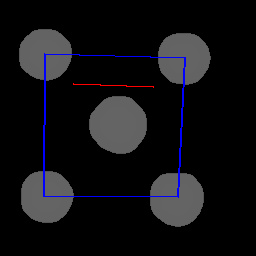

In [4]:
def get_line_from_two_points(p1, p2):
    if p1[0] == p2[0]:  # Vertical line
        raise ValueError("Vertical line - slope is undefined.")
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    n = p1[1] - m * p1[0]
    return Line(m, n)

def is_point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

import math



def get_point_given_distance(distance, line, origin, reference_point):
    """
    Calculate the point at a given distance along a line from the origin point,
    and return the point closest to the given reference point.
    
    :param distance: Distance to travel along the line.
    :param line: Line class instance representing the line.
    :param origin: Tuple (x, y) representing the starting point.
    :param reference_point: Tuple (x, y) representing the point to which the closest point is determined.
    :return: Tuple (x, y) representing the point closest to the reference point.
    """
    # Calculate the two possible points at the given distance
    dx = distance / math.sqrt(1 + line.m ** 2)
    dy = line.m * dx

    point1 = (origin[0] + dx, origin[1] + dy)
    point2 = (origin[0] - dx, origin[1] - dy)

    dist1 = math.sqrt((point1[0] - reference_point[0]) ** 2 + (point1[1] - reference_point[1]) ** 2)
    dist2 = math.sqrt((point2[0] - reference_point[0]) ** 2 + (point2[1] - reference_point[1]) ** 2)

    # Return the point that is closer to the reference point
    if dist1 < dist2:
        return point1
    else:
        return point2

def generate_parallel_line(line, point):
    """
    Generate a line parallel to the given line that passes through the given point.

    :param line: Line class instance representing the original line.
    :param point: Tuple (x, y) representing the point through which the new line passes.
    :return: Line class instance representing the new parallel line.
    """
    m = line.m
    x, y = point
    n = y - m * x
    return Line(m, n)

def intersection_point(line1, line2):
    """
    Calculate the intersection point between two lines.

    :param line1: First line (Line class instance).
    :param line2: Second line (Line class instance).
    :return: Tuple (x, y) representing the intersection point.
    """
    m1, n1 = line1.m, line1.n
    m2, n2 = line2.m, line2.n
    
    if m1 == m2:
        raise ValueError("The lines are parallel and do not intersect.")
    
    x = (n2 - n1) / (m1 - m2)
    y = m1 * x + n1
    
    return [x, y]

diameter=30 #Diametro
## Obtener lineas de la area
Ltop = get_line_from_two_points([ox1[0],oy1[0]], [ox1[1], oy1[1]])
LRight = get_line_from_two_points([ox1[1],oy1[1]], [ox1[2], oy1[2]])
LBot = get_line_from_two_points([ox1[2],oy1[2]], [ox1[3], oy1[3]])
LLeft = get_line_from_two_points([ox1[3],oy1[3]], [ox1[0], oy1[0]])

## Obtener puntos dentro de las lineas para conseguir rectas generadoras
Pi1=get_point_given_distance(diameter, Ltop, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi2=get_point_given_distance(diameter, LLeft, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi3=get_point_given_distance(diameter, Ltop, [ox1[1],oy1[1]], [ox1[2],oy1[2]])

## Rectas generadoras
Lgen1=generate_parallel_line(LLeft, Pi1)
Lgen2=generate_parallel_line(LRight, Pi3)

# Primera recta paralela
Par1=generate_parallel_line(Ltop, Pi2)

## Obtener puntos de la primera recta con el cru
P1=intersection_point(Lgen1, Par1)
P2=intersection_point(Par1, Lgen2)

solution=[tuple(P1), tuple(P2)]

draw.line(solution, fill="red", width=2)
display.display(img)

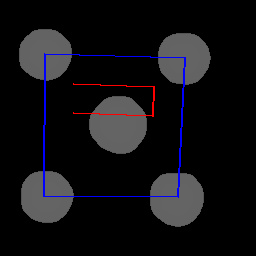

In [5]:
# P3 a partir de la recta paralela a LLeft
P3=get_point_given_distance(diameter, Lgen1, P2, [ox1[2],oy1[2]])
solution.append(tuple(P3))
# Fem el mateix per a P4
P4=get_point_given_distance(diameter, Lgen2, P1, [ox1[2],oy1[2]])
solution.append(tuple(P4))

draw.line(solution, fill="red", width=2)
display.display(img)

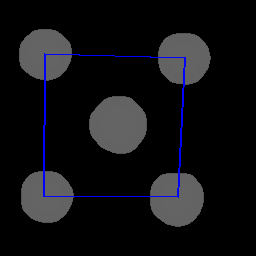

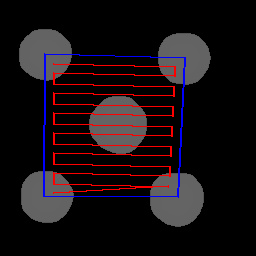

In [5]:
from functions import *
from PIL import Image, ImageDraw
import IPython.display as display

def get_area_lines(ox, oy):
    ## Obtener lineas de la area
    Ltop = get_line_from_two_points([ox[0],oy[0]], [ox[1], oy[1]])
    LRight = get_line_from_two_points([ox[1],oy[1]], [ox[2], oy[2]])
    LBot = get_line_from_two_points([ox[2],oy[2]], [ox[3], oy[3]])
    LLeft = get_line_from_two_points([ox[3],oy[3]], [ox[0], oy[0]])
    return Ltop, LRight, LBot, LLeft

def get_points(ox, oy):
    return [ox[0],oy[0]], [ox[1],oy[1]], [ox[2],oy[2]], [ox[3],oy[3]]

def gen_image(background_image_path, ox, oy):
    area_coords= list(zip(ox, oy))
    img = Image.open(background_image_path)

    img = Image.open(background_image_path)
    draw = ImageDraw.Draw(img)

    # Draw the area boundary
    draw.polygon(area_coords, outline="blue", fill=None, width=2)

    display.display(img)
    return draw, img

## Parameters
background_image_path = "image.png"
ox1 = [44, 185, 178, 43]
oy1 = [53, 57, 197, 196]
diameter=10

## Return value
solution=[]

draw, img = gen_image(background_image_path, ox1, oy1)

LTop, LRight, LBot, LLeft = get_area_lines(ox1, oy1)
Po1, Po2, Po3, Po4 = get_points(ox1, oy1)

## Obtener puntos dentro de las lineas para conseguir rectas generadoras
Pgen1=get_point_given_distance(diameter, LTop, Po1, Po4)
gen1=generate_parallel_line(LLeft, Pgen1)

Pgen2=get_point_given_distance(diameter, LTop, Po2, Po3)
gen2=generate_parallel_line(LRight, Pgen2)

# Gen first two points (from top)
P1=intersection_point(gen1, LTop)
P2=intersection_point(gen2, LTop)

# TODO: tratar edge case donde Ltop este muy cerca de LBot en algun lado (por parte de Pi1 o Pi2), mas cerca que el diametro

EndGen=True # Este valor representa en que linea generadora nos hemos quedado al acabar la generacion quadrada True si esta en 1 i False si esta en 2

swap=False # Swap points

# Generacion quadrada
while True:

    # P3 a partir de la recta paralela a LLeft
    P1=get_point_given_distance(diameter, gen1, P1, Po4)
    solution.append(tuple(P1))
    if distance_point_to_line(P1, LBot) < diameter:
        break

    # Fem el mateix per a P4
    P2=get_point_given_distance(diameter, gen2, P2, Po3)
    solution.append(tuple(P2))

    if distance_point_to_line(P2, LBot) < diameter:
        EndGen=False
        break

    if swap:
        solution[-1], solution[-2] = solution[-2], solution[-1]
    swap = not swap

draw.line(solution, fill="red", width=2)
display.display(img)

In [2]:
def reorder_points(xs, ys):
    points = list(zip(xs, ys))
    
    # Function to determine the cross product of vectors OA and OB
    # A positive cross product indicates a counter-clockwise turn, negative indicates clockwise, and zero indicates a collinear point.
    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
    
    # Sort the points by x, then by y
    points = sorted(points)
    
    # Build the lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)
    
    # Build the upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)
    
    # Concatenate lower and upper hull to get the full convex hull
    # The last point of each half is omitted because it's repeated at the beginning of the other half
    convex_hull = lower[:-1] + upper[:-1]
    
    # Since we know there are exactly 4 points, the convex hull should contain exactly those 4 points
    if len(convex_hull) != 4:
        raise ValueError("The points do not form a convex quadrilateral.")
    
    return convex_hull

# Example usage
ox4 = [120, 180, 120, 125]
oy4 = [50, 125, 200, 45]
ordered_points = reorder_points(ox4, oy4)
print(ordered_points)


[(120, 50), (125, 45), (180, 125), (120, 200)]
